In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [3]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-04-08 19:11:32--  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 3974305 (3,8M) [application/x-httpd-php]
Сохранение в: «adult.data.1»

adult.data.1        100%[===================>]   3,79M  1,54MB/s    за 2,5s    

2019-04-08 19:11:35 (1,54 MB/s) - «adult.data.1» сохранён [3974305/3974305]



In [4]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [5]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']
cols

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'result']

In [24]:
df = pd.read_csv('adult.data', skipinitialspace=True, names = cols)

In [25]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [42]:
df["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [52]:
df.groupby('sex')["age"].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [76]:
a = df["native-country"].count()
df["native-country"].value_counts()["United-States"]/a

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

Text(0.5, 1.0, 'Distribution')

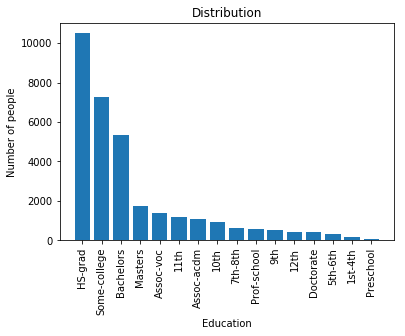

In [102]:
plt.bar(df.education.value_counts().index, df.education.value_counts().values)
plt.xticks(rotation='vertical')
plt.xlabel('Education')
plt.ylabel('Number of people');
plt.title("Distribution")

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [116]:

numb = df['marital-status']=='Divorced'
print(df[numb].fnlwgt.mean())
df[numb].fnlwgt.std()


185802.79045689848


105646.789459336

Text(0.5, 0, 'Weight')

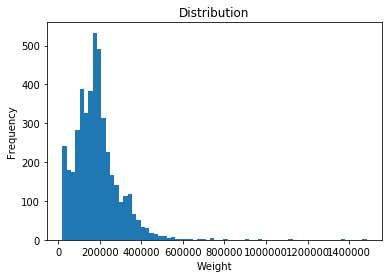

In [126]:
hist = df[divorced].fnlwgt
hist = df_hist.plot.hist(bins = 70)
hist.set_title('Distribution');
hist.set_xlabel('Weight')

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

> Ответ: оно мне напоминает Пуассона распределение

In [150]:
b = df.groupby('result')['education'].value_counts()['>50K']["Bachelors"]
m = df.groupby('result')['education'].value_counts()['>50K']["Masters"]
d = df.groupby('result')['education'].value_counts()['>50K']["Doctorate"]
print((b+m+d)/df.result.value_counts()[1])

0.4445861497258003


> Ответ: оно мне напоминает ... распределение

> Ответ: Нет

# Сколько в среднем работают люди в неделю в зависимости от education?

In [151]:
df.groupby('education')['hours-per-week'].mean()

education
10th            37.052519
11th            33.925957
12th            35.780600
1st-4th         38.255952
5th-6th         38.897898
7th-8th         39.366873
9th             38.044747
Assoc-acdm      40.504217
Assoc-voc       41.610709
Bachelors       42.614006
Doctorate       46.973366
HS-grad         40.575374
Masters         43.836332
Preschool       36.647059
Prof-school     47.425347
Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [152]:
df.groupby('sex')['hours-per-week'].mean()

sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [167]:
Buf = df.groupby('relationship')['hours-per-week'].mean()
print((Buf[1] + Buf[4])/Buf.sum())
print("Те, кто в отношениях")
Buf

0.3450818493462511
Те, кто в отношениях


relationship
Husband           44.120139
Not-in-family     40.595665
Other-relative    37.006116
Own-child         33.269337
Unmarried         39.103018
Wife              36.861607
Name: hours-per-week, dtype: float64

# Из каких стран люди работают farmers/fishers?

In [172]:
index = df.occupation=='Farming-fishing'
df[index]['native-country'].value_counts().index

Index(['United-States', 'Mexico', '?', 'Puerto-Rico', 'Philippines',
       'Guatemala', 'Cuba', 'El-Salvador', 'Vietnam', 'Canada', 'Italy',
       'France', 'Hong', 'Cambodia', 'England', 'Yugoslavia', 'Poland',
       'Portugal', 'Ireland', 'Germany', 'Japan'],
      dtype='object')

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [181]:
Max = df['hours-per-week'].max()
print(Max)
print(df['hours-per-week'].value_counts()[Max])
maxW = df['hours-per-week'] == Max
b = df.groupby('hours-per-week')['result'].value_counts()[Max]
b

99
85


result
<=50K    60
>50K     25
Name: result, dtype: int64